In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#part2 in python
bundesliga = pd.read_csv("bundesliga.csv")
bundesliga.head()

,SEASON,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTHG,FTAG,FTTG
0,1994,Bundesliga 1,1993-08-07,Bayern Munich,Freiburg,3-1,3,1,4
1,1994,Bundesliga 1,1993-08-07,Dortmund,Karlsruhe,2-1,2,1,3
2,1994,Bundesliga 1,1993-08-07,Duisburg,Leverkusen,2-2,2,2,4
3,1994,Bundesliga 1,1993-08-07,FC Koln,Kaiserslautern,0-2,0,2,2
4,1994,Bundesliga 1,1993-08-07,Hamburg,Nurnberg,5-2,5,2,7


Columns in dataset: Index(['SEASON', 'LEAGUE', 'DATE', 'HOMETEAM', 'AWAYTEAM', 'FTSC', 'FTHG',
       'FTAG', 'FTTG'],
      dtype='object')


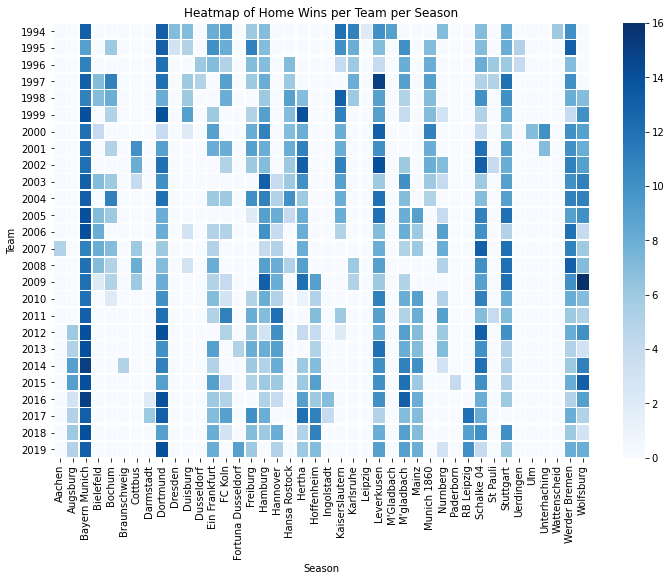

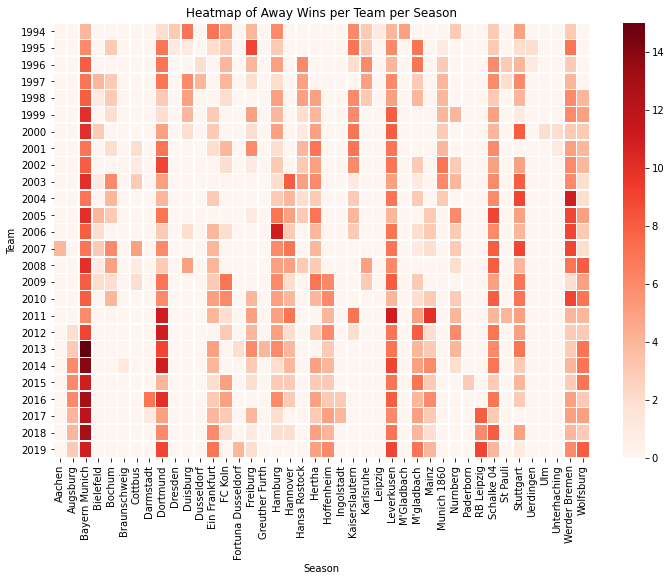

In [5]:
bundesliga.columns = bundesliga.columns.str.strip().str.upper()

print("Columns in dataset:", bundesliga.columns)

def get_match_result(row):
    if row['FTHG'] > row['FTAG']:
        return 'H'
    elif row['FTHG'] < row['FTAG']:
        return 'A'
    else:
        return 'D'

bundesliga['FTR'] = bundesliga.apply(get_match_result, axis=1)

home_wins = bundesliga[bundesliga['FTR'] == 'H'].groupby(['SEASON', 'HOMETEAM']).size().unstack(fill_value=0)
away_wins = bundesliga[bundesliga['FTR'] == 'A'].groupby(['SEASON', 'AWAYTEAM']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(home_wins, cmap="Blues", annot=False, linewidths=0.5)
plt.title("Heatmap of Home Wins per Team per Season")
plt.xlabel("Season")
plt.ylabel("Team")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(away_wins, cmap="Reds", annot=False, linewidths=0.5)
plt.title("Heatmap of Away Wins per Team per Season")
plt.xlabel("Season")
plt.ylabel("Team")
plt.show()

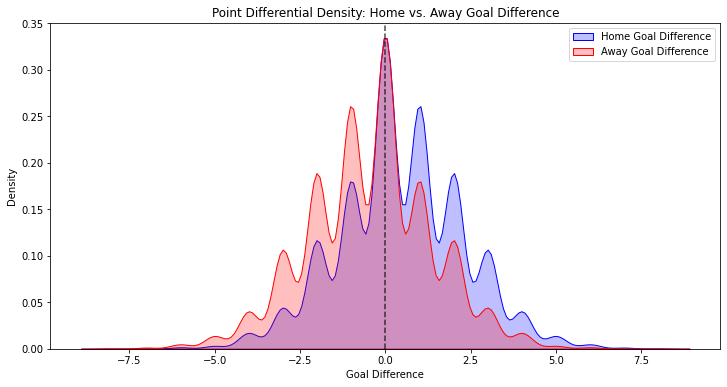

In [6]:
bundesliga['HOME_GOAL_DIFF'] = bundesliga['FTHG'] - bundesliga['FTAG']
bundesliga['AWAY_GOAL_DIFF'] = bundesliga['FTAG'] - bundesliga['FTHG']

plt.figure(figsize=(12, 6))
sns.kdeplot(bundesliga['HOME_GOAL_DIFF'], fill=True, color='blue', label='Home Goal Difference')
sns.kdeplot(bundesliga['AWAY_GOAL_DIFF'], fill=True, color='red', label='Away Goal Difference')
plt.axvline(0, color='black', linestyle='--', alpha=0.7)
plt.title("Point Differential Density: Home vs. Away Goal Difference")
plt.xlabel("Goal Difference")
plt.ylabel("Density")
plt.legend()
plt.show()

In [21]:
def get_match_result(row):
    if row['FTHG'] > row['FTAG']:
        return 'H'
    elif row['FTHG'] < row['FTAG']:
        return 'A'
    else:
        return 'D'

bundesliga['FTR'] = bundesliga.apply(get_match_result, axis=1)

home_wins = bundesliga[bundesliga['FTR'] == 'H'].groupby(['SEASON', 'HOMETEAM']).size().unstack(fill_value=0)
away_wins = bundesliga[bundesliga['FTR'] == 'A'].groupby(['SEASON', 'AWAYTEAM']).size().unstack(fill_value=0)

bundesliga['HOME_GOAL_DIFF'] = bundesliga['FTHG'] - bundesliga['FTAG']
bundesliga['AWAY_GOAL_DIFF'] = bundesliga['FTAG'] - bundesliga['FTHG']

goal_difference = (bundesliga.groupby(['SEASON', 'HOMETEAM'])['HOME_GOAL_DIFF'].sum() + 
                    bundesliga.groupby(['SEASON', 'AWAYTEAM'])['AWAY_GOAL_DIFF'].sum()).unstack(fill_value=0)

unique_teams = goal_difference.columns
colors = sns.color_palette("husl", len(unique_teams))
team_colors = {team: color for team, color in zip(unique_teams, colors)}

with PdfPages("goal_difference_per_season.pdf") as pdf:
    for season in goal_difference.index:
        season_data = goal_difference.loc[season].sort_values(ascending=True)
        winner = season_data.idxmax()
        
        plt.figure(figsize=(10, 6))
        bars = plt.barh(season_data.index, season_data.values, color=[team_colors[team] for team in season_data.index])
        
        bars[season_data.index.get_loc(winner)].set_edgecolor("black")
        bars[season_data.index.get_loc(winner)].set_linewidth(2)
        
        plt.xlabel("Goal Difference")
        plt.ylabel("Team")
        plt.title(f"Goal Difference per Team - {season}")
        pdf.savefig()
        plt.close()


Estimated value of π with 10000 samples: 3.1536


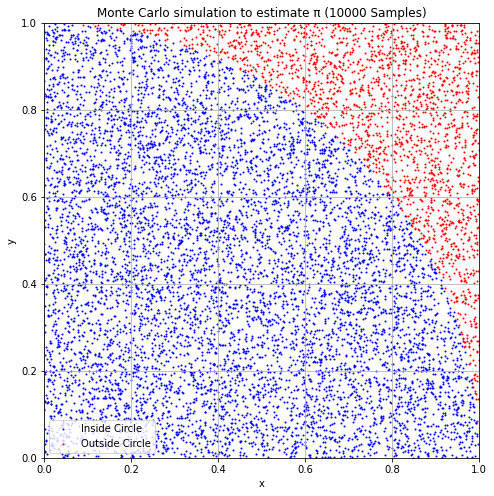

In [20]:
def monte_carlo_pi(num_samples):
    x = np.random.uniform(0, 1, num_samples)
    y = np.random.uniform(0, 1, num_samples)

    distances = np.sqrt(x**2 + y**2)

    inside_circle = distances <= 1
    pi_estimate = (inside_circle.sum() / num_samples) * 4 

    return pi_estimate, inside_circle, x, y

num_samples = 10000
pi_estimate, inside_circle, x, y = monte_carlo_pi(num_samples)

print(f"Estimated value of π with {num_samples} samples: {pi_estimate}")

plt.figure(figsize=(8, 8))
plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1, label='Inside Circle')
plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1, label='Outside Circle')
plt.title(f'Monte Carlo simulation to estimate π ({num_samples} Samples)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid()
plt.show()

In [14]:
bundesliga = pd.read_csv("bundesliga.csv")
bundesliga.head()

,SEASON,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTHG,FTAG,FTTG
0,1994,Bundesliga 1,1993-08-07,Bayern Munich,Freiburg,3-1,3,1,4
1,1994,Bundesliga 1,1993-08-07,Dortmund,Karlsruhe,2-1,2,1,3
2,1994,Bundesliga 1,1993-08-07,Duisburg,Leverkusen,2-2,2,2,4
3,1994,Bundesliga 1,1993-08-07,FC Koln,Kaiserslautern,0-2,0,2,2
4,1994,Bundesliga 1,1993-08-07,Hamburg,Nurnberg,5-2,5,2,7


In [18]:
required_columns = ["SEASON", "HOMETEAM", "AWAYTEAM", "FTTG", "FTAG"]
missing_columns = [col for col in required_columns if col not in bundesliga.columns]

if missing_columns:
    raise KeyError(f"Missing columns in dataset: {missing_columns}")

bundesliga["FTR"] = bundesliga.apply(
    lambda row: "H" if row["FTTG"] > row["FTAG"] else "A" if row["FTTG"] < row["FTAG"] else "D",
    axis=1
)

bundesliga["POINTS"] = bundesliga["FTR"].map({"H": 3, "D": 1, "A": 0})

team_rankings = (
    bundesliga.groupby(["SEASON", "HOMETEAM"])
    .agg(Total_Points=("POINTS", "sum"))
    .reset_index()
)

team_rankings["Rank"] = team_rankings.groupby("SEASON")["Total_Points"].rank(method="min", ascending=False)

bundesliga = bundesliga.merge(
    team_rankings[["SEASON", "HOMETEAM", "Rank"]],
    left_on=["SEASON", "HOMETEAM"],
    right_on=["SEASON", "HOMETEAM"],
    how="left"
).rename(columns={"Rank": "HOMERANK"})

bundesliga = bundesliga.merge(
    team_rankings[["SEASON", "HOMETEAM", "Rank"]],
    left_on=["SEASON", "AWAYTEAM"],
    right_on=["SEASON", "HOMETEAM"],
    how="left"
).rename(columns={"Rank": "AWAYRANK"}).drop(columns=["HOMETEAM_y"]).rename(columns={"HOMETEAM_x": "HOMETEAM"})

bundesliga["HOMERANK"] = pd.to_numeric(bundesliga["HOMERANK"], errors="coerce").fillna(999)
bundesliga["AWAYRANK"] = pd.to_numeric(bundesliga["AWAYRANK"], errors="coerce").fillna(999)

top_teams = (
    team_rankings.groupby("HOMETEAM")
    .agg(Total_Points=("Total_Points", "sum"))
    .sort_values(by="Total_Points", ascending=False)
    .head(5)
    .index.tolist()
)

bundesliga["Rank_Diff"] = bundesliga["HOMERANK"] - bundesliga["AWAYRANK"]
bundesliga["Goal_Diff"] = bundesliga["FTTG"] - bundesliga["FTAG"]

upsets = bundesliga[
    (bundesliga["HOMETEAM"].isin(top_teams)) &  
    (bundesliga["AWAYRANK"] >= bundesliga["HOMERANK"] + 8) &  
    (bundesliga["FTR"] == "A")  
]

if upsets.empty:
    print("No upsets found based on the current criteria.")
else:
    
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        data=upsets,
        x="Rank_Diff",
        y="Goal_Diff",
        hue="AWAYTEAM",
        palette="tab10",
        s=100
    )

    for _, row in upsets.iterrows():
        plt.text(row["Rank_Diff"], row["Goal_Diff"], row["AWAYTEAM"], fontsize=9)

    plt.axhline(0, color="gray", linestyle="--", linewidth=1)
    plt.xlabel("Rank Difference (Home Rank - Away Rank)")
    plt.ylabel("Goal Difference (Home Goals - Away Goals)")
    plt.title("Upset Visualizer: Teams 8+ Places Below Beating Top-5 Teams")

    if len(upsets["AWAYTEAM"].unique()) > 0:
        plt.legend(title="Winning Team", bbox_to_anchor=(1.05, 1), loc="upper left")
    else:
        plt.legend().remove()

    plt.show()

#this is for 4.2, tried many times could not handle the problems that I had

TypeError: arg must be a list, tuple, 1-d array, or Series